In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 96% 49.0M/50.9M [00:01<00:00, 53.9MB/s]
100% 50.9M/50.9M [00:01<00:00, 50.5MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [8]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df_resampled = df.resample('H').last().round(2)
df_resampled


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.43,395.71,10.07,1.74,249.21,253.24,250.58,...,250.88,457.40,432.96,424.95,443.56,502.26,446.37,523.34,66.91,1.31
2017-03-10 02:00:00,55.20,16.98,3170.41,539.67,399.70,10.16,1.67,249.29,248.27,248.31,...,249.77,462.60,488.72,441.67,433.63,448.48,480.87,489.38,67.06,1.11
2017-03-10 03:00:00,55.20,16.98,3365.65,573.52,399.02,10.09,1.71,249.38,253.31,252.09,...,249.06,456.44,440.43,456.62,432.74,464.33,445.95,432.91,66.97,1.27
2017-03-10 04:00:00,55.20,16.98,2693.75,592.13,409.20,9.95,1.72,248.30,251.91,251.12,...,249.24,459.25,480.11,453.81,433.88,438.64,421.97,408.19,66.75,1.36
2017-03-10 05:00:00,55.20,16.98,2352.22,601.81,398.14,9.84,1.76,248.95,246.31,248.07,...,252.69,558.54,548.28,551.96,561.72,543.07,529.26,514.24,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,2888.06,494.99,376.47,9.28,1.67,317.06,297.75,301.68,...,302.33,577.94,489.96,505.00,440.59,481.30,434.70,401.80,65.05,1.65
2017-09-09 20:00:00,49.75,23.20,4218.57,492.03,378.63,9.16,1.65,302.08,301.35,300.54,...,342.62,412.49,510.39,342.20,371.88,594.52,443.69,375.04,64.83,1.71
2017-09-09 21:00:00,49.75,23.20,3159.10,520.99,381.47,9.58,1.74,296.06,298.48,299.08,...,332.39,401.46,533.41,390.06,395.46,587.86,489.41,504.98,64.29,1.80


In [9]:
df_resampled['% Silica Concentrate delay'] = df_resampled['% Silica Concentrate'].shift(freq= '-2h')
df_resampled

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Silica Concentrate delay
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.43,395.71,10.07,1.74,249.21,253.24,250.58,...,457.40,432.96,424.95,443.56,502.26,446.37,523.34,66.91,1.31,1.27
2017-03-10 02:00:00,55.20,16.98,3170.41,539.67,399.70,10.16,1.67,249.29,248.27,248.31,...,462.60,488.72,441.67,433.63,448.48,480.87,489.38,67.06,1.11,1.36
2017-03-10 03:00:00,55.20,16.98,3365.65,573.52,399.02,10.09,1.71,249.38,253.31,252.09,...,456.44,440.43,456.62,432.74,464.33,445.95,432.91,66.97,1.27,1.34
2017-03-10 04:00:00,55.20,16.98,2693.75,592.13,409.20,9.95,1.72,248.30,251.91,251.12,...,459.25,480.11,453.81,433.88,438.64,421.97,408.19,66.75,1.36,1.15
2017-03-10 05:00:00,55.20,16.98,2352.22,601.81,398.14,9.84,1.76,248.95,246.31,248.07,...,558.54,548.28,551.96,561.72,543.07,529.26,514.24,66.63,1.34,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,49.75,23.20,2888.06,494.99,376.47,9.28,1.67,317.06,297.75,301.68,...,577.94,489.96,505.00,440.59,481.30,434.70,401.80,65.05,1.65,1.80
2017-09-09 20:00:00,49.75,23.20,4218.57,492.03,378.63,9.16,1.65,302.08,301.35,300.54,...,412.49,510.39,342.20,371.88,594.52,443.69,375.04,64.83,1.71,1.96
2017-09-09 21:00:00,49.75,23.20,3159.10,520.99,381.47,9.58,1.74,296.06,298.48,299.08,...,401.46,533.41,390.06,395.46,587.86,489.41,504.98,64.29,1.80,1.71


In [10]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2017-03-10 01:00:00 to 2017-09-09 21:00:00
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3490 non-null   float64
 1   % Silica Feed                 3490 non-null   float64
 2   Starch Flow                   3490 non-null   float64
 3   Amina Flow                    3490 non-null   float64
 4   Ore Pulp Flow                 3490 non-null   float64
 5   Ore Pulp pH                   3490 non-null   float64
 6   Ore Pulp Density              3490 non-null   float64
 7   Flotation Column 01 Air Flow  3490 non-null   float64
 8   Flotation Column 02 Air Flow  3490 non-null   float64
 9   Flotation Column 03 Air Flow  3490 non-null   float64
 10  Flotation Column 04 Air Flow  3490 non-null   float64
 11  Flotation Column 05 Air Flow  3490 non-null   float64
 12  Flotation Column 06 Air Fl

In [11]:
df_resampled['Air Flow Mean'] = df_resampled[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']].mean(axis=1)
df_resampled['Level Mean'] = df_resampled[['Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level']].mean(axis=1)


In [12]:
features = [
    'Amina Flow',
    'Ore Pulp pH',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
]

features_agg = [
    'Amina Flow',
    'Ore Pulp pH',
    'Air Flow Mean',
    'Level Mean'
]

target = ['% Silica Concentrate delay']

### Modelos utilizando todas as features e normalizados por Min-Max

---

In [13]:
x=df_resampled[features]
y=df_resampled[target]

scaler = MinMaxScaler()
#scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [14]:
print(x_train.shape[1:],y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(9,) (2233, 1)
(559, 9) (559, 1)
(698, 9) (698, 1)


In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, SimpleRNN, LSTM, Lambda, GlobalAveragePooling1D, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD

In [20]:
number_features = x_train.shape[1]

In [17]:
nn = Sequential([
  Input(shape=(number_features,)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(1)
])

nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
nn.compile(optimizer=SGD(learning_rate=0.001),
                     loss='mse')

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=5,
            min_delta=0.001,
            min_lr=0.00001,
        )

# Train the model
nn.fit(
    x_train,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.3576 - val_loss: 1.8927 - learning_rate: 0.0010
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8379 - val_loss: 1.2034 - learning_rate: 0.0010
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2178 - val_loss: 1.1819 - learning_rate: 0.0010
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2845 - val_loss: 1.1767 - learning_rate: 0.0010
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1740 - val_loss: 1.1566 - learning_rate: 0.0010
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1877 - val_loss: 1.1600 - learning_rate: 0.0010
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2090 - val_loss: 1.1582 - learning_rate: 0.0010
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2378 - val_loss: 1.1500 - learning_rate: 0.0010
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2218 - val_loss: 1.1524 - learning_rate: 0.0010
Epoch 10/

Text(0, 0.5, 'Loss')

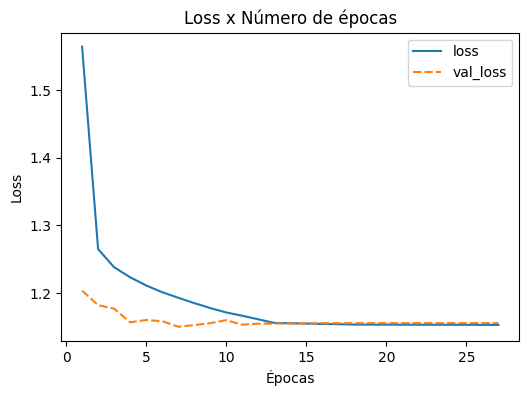

In [19]:
# Plot the training and validation loss
history_f = pd.DataFrame(nn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE =  0.8523905696937139
MSE =  1.1500100094274326
R2 =  0.03687248915685826


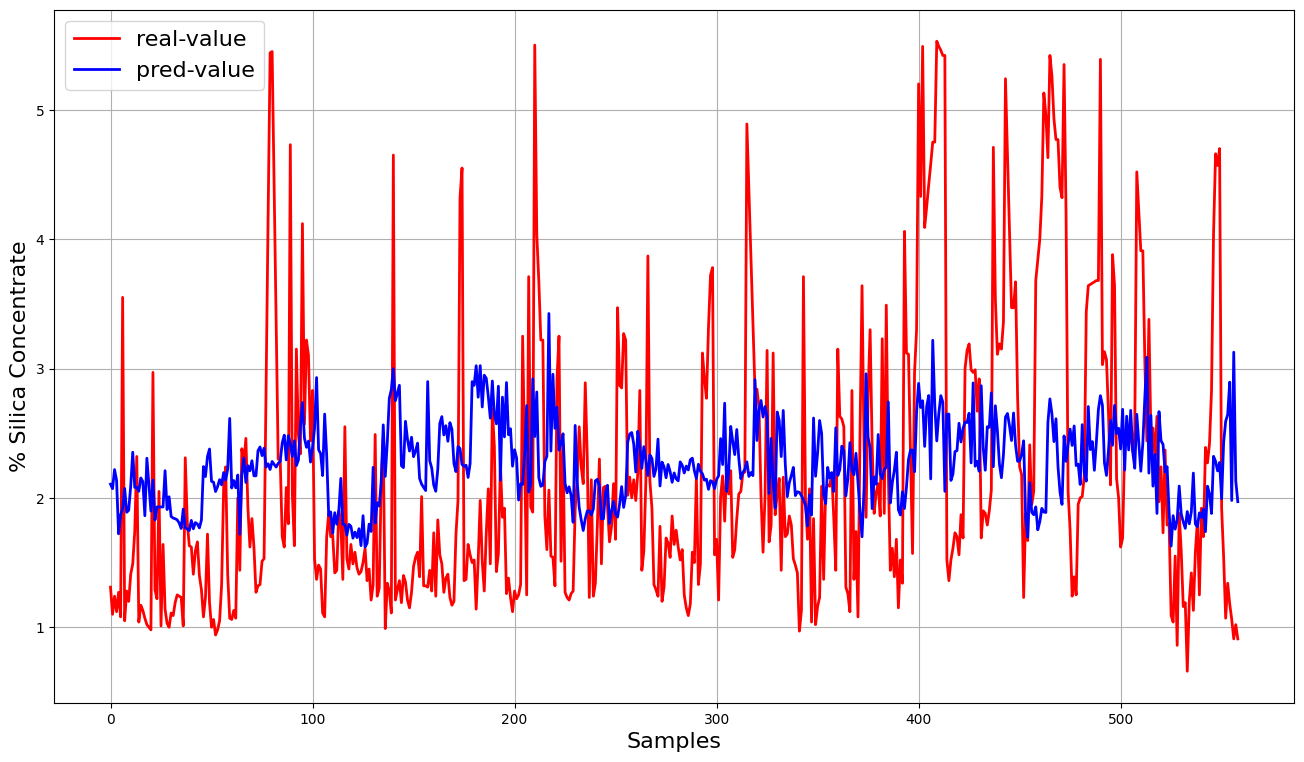

In [20]:
prediction = nn.predict(x_val)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

In [42]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))
rnn = Sequential([
    Input(shape=(None,number_features)),
    SimpleRNN(2048, activation='relu'),
    Dense(1)
])

rnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 2048)                │       4,214,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,216,833 (16.09 MB)

 Trainable params: 4,216,833 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Compile the model
rnn.compile(optimizer=SGD(learning_rate=0.0001),
                     loss='mse')

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=25,
            min_delta=0.001,
            min_lr=0.000001,
        )

# Train the model
rnn.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.6385 - val_loss: 5.5506 - learning_rate: 1.0000e-04
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8433 - val_loss: 4.9806 - learning_rate: 1.0000e-04
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2934 - val_loss: 4.4889 - learning_rate: 1.0000e-04
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9182 - val_loss: 4.0638 - learning_rate: 1.0000e-04
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1905 - val_loss: 3.6957 - learning_rate: 1.0000e-04
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8996 - val_loss: 3.3767 - learning_rate: 1.0000e-04
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4802 - val_loss: 3.1003 - learning_rate: 1.0000e-04
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1843 - val_loss: 2.8603 - learning_rate: 1.0000e-04
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9613 - val_loss: 2.6516 -

Text(0, 0.5, 'Loss')

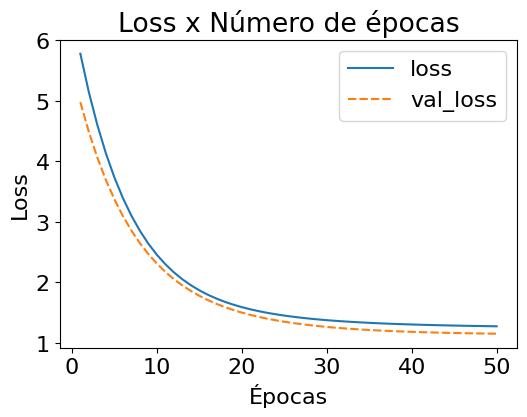

In [44]:
# Plot the training and validation loss
history_f = pd.DataFrame(rnn.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
MAE =  0.831712447406994
MSE =  1.1247575574370967
R2 =  0.058021288757522105


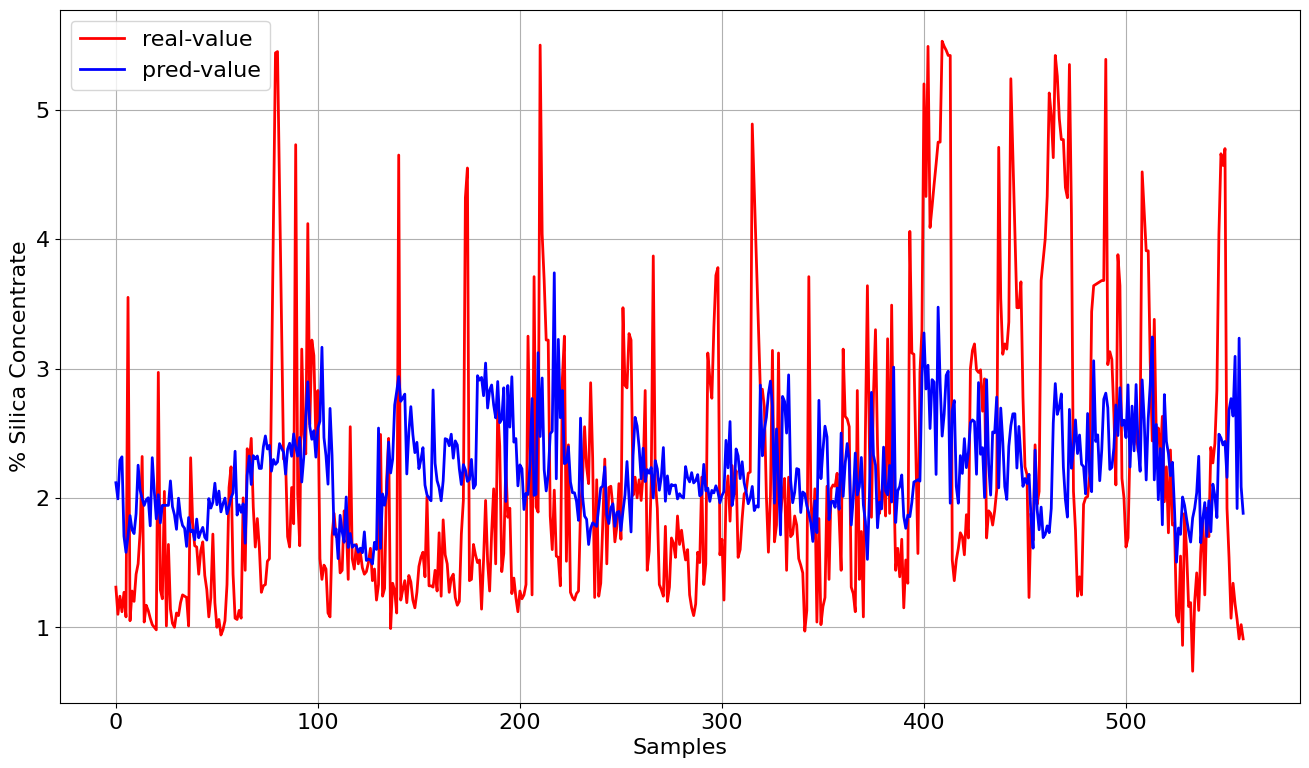

In [45]:
prediction = rnn.predict(x_val_reshaped)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

In [25]:
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_train.shape[1]))

lstm = Sequential([
    Input(shape=(None,number_features)),
    LSTM(2048, activation='relu'),
    Dense(1)
])

lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 512)                 │       1,069,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2000)                │       1,026,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2000)                │       4,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,099,057 (23.27 MB)

 Trainable params: 6,099,057 (23.27 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
lstm.compile(optimizer=SGD(learning_rate=0.01),
                     loss='mse')

# Early Stopping
early = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
# Reduce on Plateau
red_plateau = ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.1,
            patience=20,
            min_delta=0.001,
            min_lr=0.00001,
        )

# Train the model
lstm.fit(
    x_train_reshaped,
    y_train,
    batch_size=32,
    callbacks=[early, red_plateau],
    validation_data=[x_val_reshaped,y_val],
    epochs=1000
)


Epoch 1/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 3.2660 - val_loss: 1.2236 - learning_rate: 0.0100
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2208 - val_loss: 1.2052 - learning_rate: 0.0100
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2374 - val_loss: 1.2167 - learning_rate: 0.0100
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2047 - val_loss: 1.2078 - learning_rate: 0.0100
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0632 - val_loss: 1.2343 - learning_rate: 0.0100
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1128 - val_loss: 1.2168 - learning_rate: 0.0100
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2001 - val_loss: 1.2077 - learning_rate: 0.0100
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1437 - val_loss: 1.2036 - learning_rate: 0.0100
Epoch 9/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1155 - val_loss: 1.2004 - learning_rate: 0.0100
Epoch 10/

Text(0, 0.5, 'Loss')

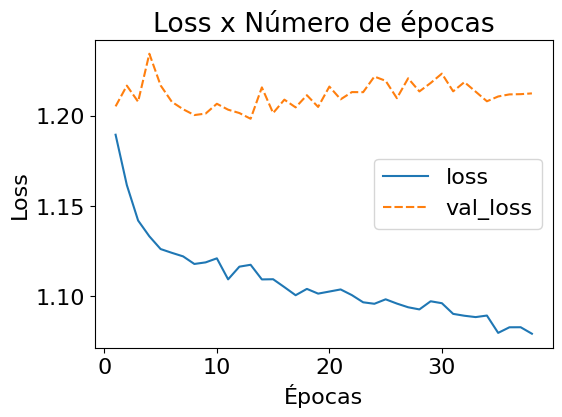

In [27]:
# Plot the training and validation loss
history_f = pd.DataFrame(lstm.history.history)
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=history_f.loc[1:50, ['loss', 'val_loss']])
plt.title("Loss x Número de épocas")
plt.xlabel('Épocas')
plt.ylabel('Loss')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
MAE =  0.8588190021327229
MSE =  1.198323702517258
R2 =  -0.00358998211190098


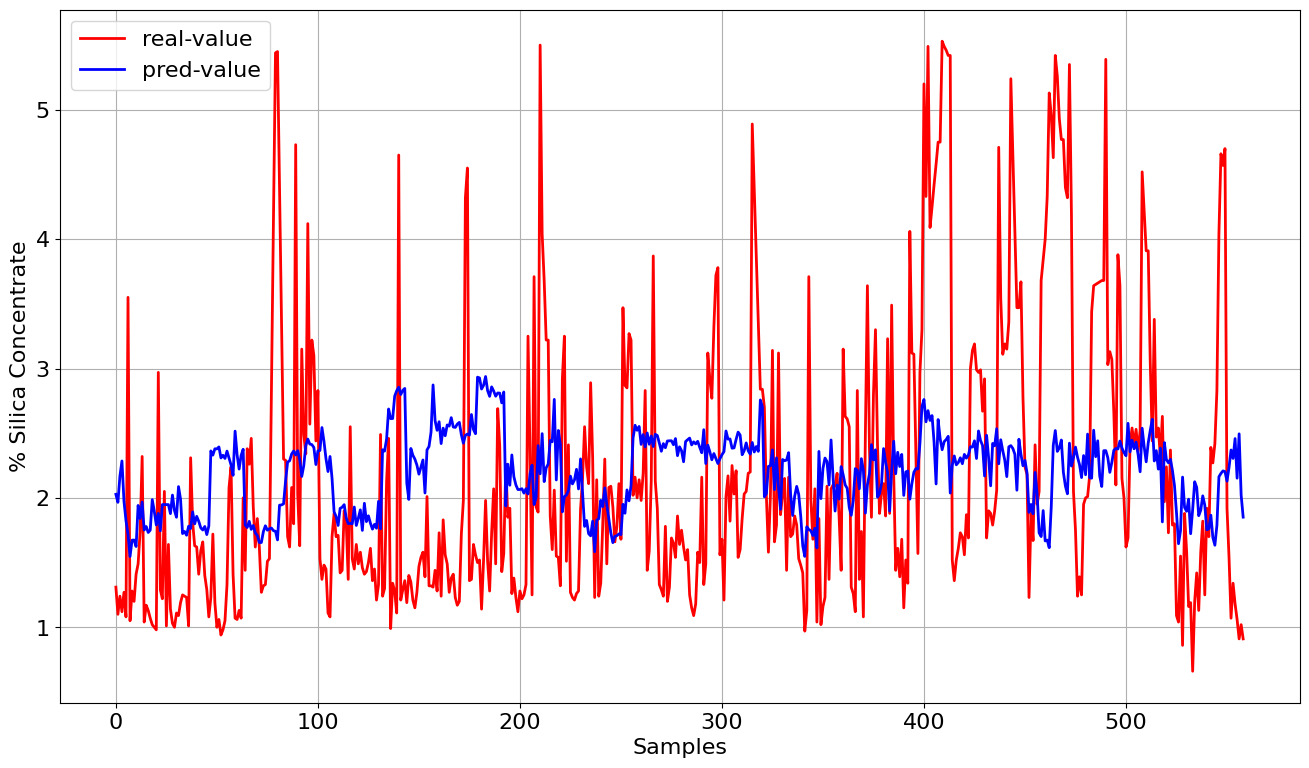

In [28]:
prediction = lstm.predict(x_val_reshaped)

print("MAE = ", mean_absolute_error(y_val, prediction))
print("MSE = ", mean_squared_error(y_val, prediction))
print("R2 = ", r2_score(y_val, prediction))

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()